#### SUBMITTED BY


### PROJECT - CCI DATASET

### Importing Packages

In [208]:
#importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

### Reading the File

In [209]:
df=pd.read_excel(r'C:\Users\Shilpi\OneDrive\Desktop\PROJECTS\TIME SERIES\CCI.xlsx')

### PART 1 : Exploratory Data Analysis

In [210]:
df.shape

(105, 2)

In [211]:
 df.columns

Index(['TIME', 'CONSUMER CONF INDEX'], dtype='object')

In [212]:
df.dtypes

TIME                   datetime64[ns]
CONSUMER CONF INDEX           float64
dtype: object

In [213]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TIME                 105 non-null    datetime64[ns]
 1   CONSUMER CONF INDEX  105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [214]:
round(df.describe(),3)
     

,CONSUMER CONF INDEX
count,105.00
mean,100.12
std,1.45
min,95.97
25%,99.33
50%,100.65
75%,101.23
max,101.64


C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONSUMER CONF INDEX', ylabel='Density'>

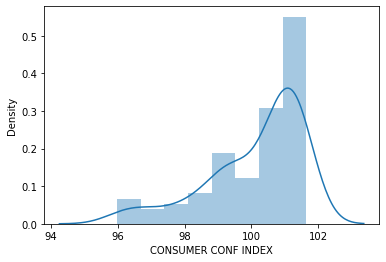

In [215]:
sns.distplot(df['CONSUMER CONF INDEX'])

In [216]:
def outliers(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR = Q3 - Q1
    LOWER_RANGE = Q1 - (1.5*IQR)
    UPPER_RANGE= Q3 + (1.5*IQR)
    return  LOWER_RANGE,UPPER_RANGE

<AxesSubplot:xlabel='CONSUMER CONF INDEX'>

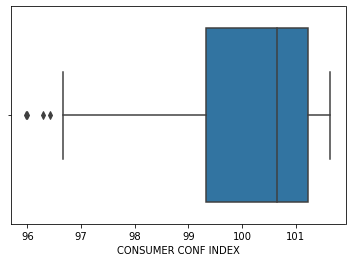

In [217]:
sns.boxplot(x=df['CONSUMER CONF INDEX'])

In [218]:
#Check the lower range and upper range for the variable with zscore
LOWER_RANGE,UPPER_RANGE=outliers(df['CONSUMER CONF INDEX'])
print("lower range",LOWER_RANGE, "and upper range", UPPER_RANGE)
#Capping the outliers
df['CONSUMER CONF INDEX'] = np.where(df['CONSUMER CONF INDEX']>UPPER_RANGE,UPPER_RANGE,df['CONSUMER CONF INDEX'])
df['CONSUMER CONF INDEX'] = np.where(df['CONSUMER CONF INDEX']<LOWER_RANGE,LOWER_RANGE,df['CONSUMER CONF INDEX'])

lower range 96.49880000000002 and upper range 104.06232


<AxesSubplot:xlabel='CONSUMER CONF INDEX'>

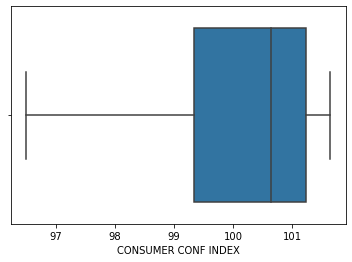

In [219]:
sns.boxplot(x=df['CONSUMER CONF INDEX'])

In [227]:
df = df.set_index("TIME")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


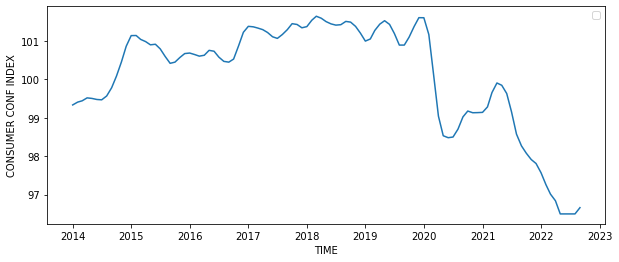

In [228]:
plt.figure( figsize=(10,4))
plt.xlabel( "TIME" )
plt.ylabel( "CONSUMER CONF INDEX" )
plt.plot( df['CONSUMER CONF INDEX'] )
plt.legend()

### MOVING AVERAGE

In [229]:
df['mavg_2'] = df['CONSUMER CONF INDEX'].rolling( window =2).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['CONSUMER CONF INDEX', 'mavg_2']][63:]

,CONSUMER CONF INDEX,mavg_2
TIME,,
2020-04-01,99.04,100.66
2020-05-01,98.53,99.60
2020-06-01,98.48,98.79
2020-07-01,98.50,98.51
2020-08-01,98.71,98.49
2020-09-01,99.02,98.60
2020-10-01,99.18,98.87
2020-11-01,99.13,99.10
2020-12-01,99.14,99.15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


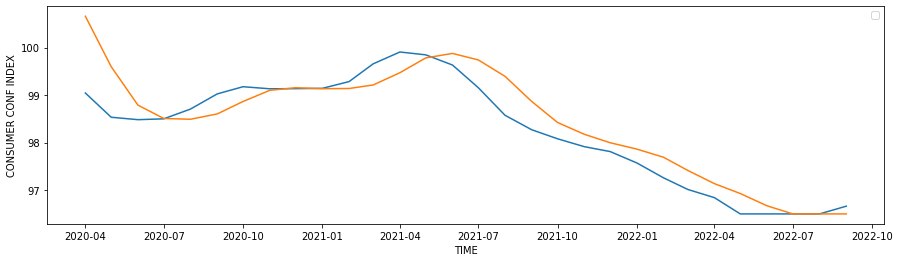

In [230]:
plt.figure( figsize=(15,4))
plt.ylabel( "CONSUMER CONF INDEX" )
plt.xlabel( "TIME" )
plt.plot( df['CONSUMER CONF INDEX'][63:] );
plt.plot( df['mavg_2'][63:]);
plt.legend();

In [231]:
df['mavg_4'] = df['CONSUMER CONF INDEX'].rolling( window =4).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['CONSUMER CONF INDEX', 'mavg_4']][63:]

,CONSUMER CONF INDEX,mavg_4
TIME,,
2020-04-01,99.04,101.13
2020-05-01,98.53,100.49
2020-06-01,98.48,99.72
2020-07-01,98.50,99.05
2020-08-01,98.71,98.64
2020-09-01,99.02,98.56
2020-10-01,99.18,98.68
2020-11-01,99.13,98.85
2020-12-01,99.14,99.01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


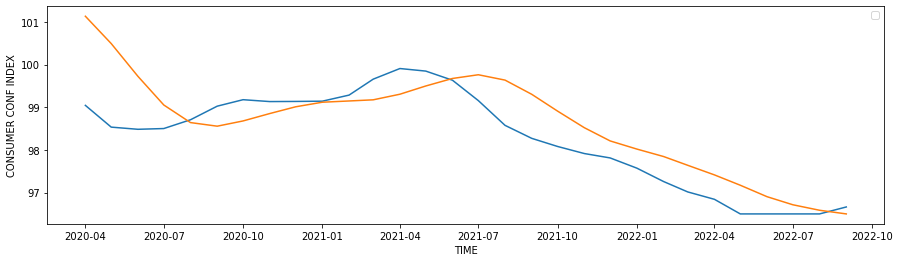

In [232]:
plt.figure( figsize=(15,4))
plt.ylabel( "CONSUMER CONF INDEX" )
plt.xlabel( "TIME" )
plt.plot( df['CONSUMER CONF INDEX'][63:] );
plt.plot( df['mavg_4'][63:]);
plt.legend();

In [233]:
df['mavg_6'] = df['CONSUMER CONF INDEX'].rolling( window =6).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['CONSUMER CONF INDEX', 'mavg_6']][63:]

,CONSUMER CONF INDEX,mavg_6
TIME,,
2020-04-01,99.04,101.17
2020-05-01,98.53,100.82
2020-06-01,98.48,100.35
2020-07-01,98.50,99.83
2020-08-01,98.71,99.31
2020-09-01,99.02,98.90
2020-10-01,99.18,98.71
2020-11-01,99.13,98.74
2020-12-01,99.14,98.84


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


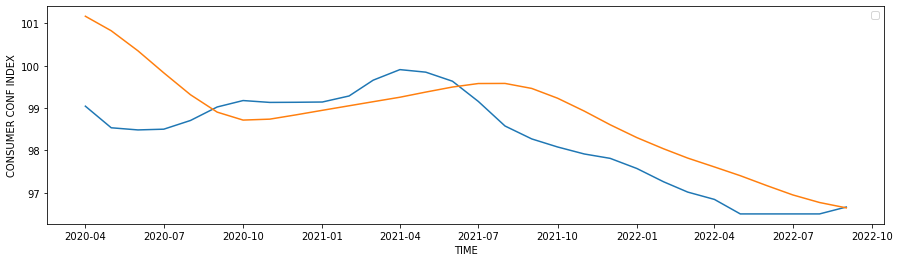

In [234]:
plt.figure( figsize=(15,4))
plt.ylabel( "CONSUMER CONF INDEX" )
plt.xlabel( "TIME" )
plt.plot( df['CONSUMER CONF INDEX'][63:] );
plt.plot( df['mavg_6'][63:]);
plt.legend();

In [235]:
df['mavg_9'] = df['CONSUMER CONF INDEX'].rolling( window =9).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['CONSUMER CONF INDEX', 'mavg_9']][63:]

,CONSUMER CONF INDEX,mavg_9
TIME,,
2020-04-01,99.04,101.11
2020-05-01,98.53,100.87
2020-06-01,98.48,100.61
2020-07-01,98.50,100.34
2020-08-01,98.71,100.05
2020-09-01,99.02,99.75
2020-10-01,99.18,99.47
2020-11-01,99.13,99.20
2020-12-01,99.14,98.97


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


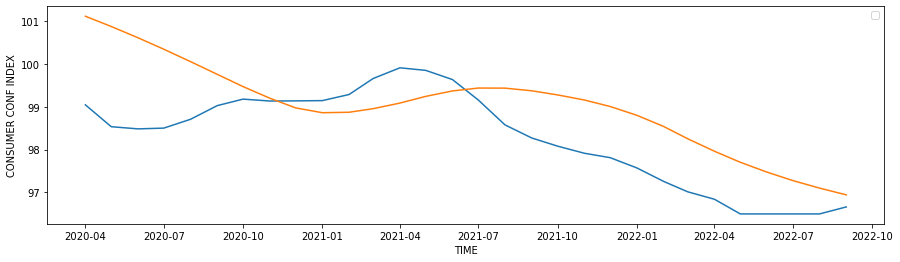

In [236]:
plt.figure( figsize=(15,4))
plt.ylabel( "CONSUMER CONF INDEX" )
plt.xlabel( "TIME" )
plt.plot( df['CONSUMER CONF INDEX'][63:] );
plt.plot( df['mavg_9'][63:]);
plt.legend();

In [237]:
df['mavg_12'] = df['CONSUMER CONF INDEX'].rolling( window =12).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['CONSUMER CONF INDEX', 'mavg_12']][63:]

,CONSUMER CONF INDEX,mavg_12
TIME,,
2020-04-01,99.04,101.20
2020-05-01,98.53,101.00
2020-06-01,98.48,100.75
2020-07-01,98.50,100.50
2020-08-01,98.71,100.28
2020-09-01,99.02,100.10
2020-10-01,99.18,99.94
2020-11-01,99.13,99.78
2020-12-01,99.14,99.59


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


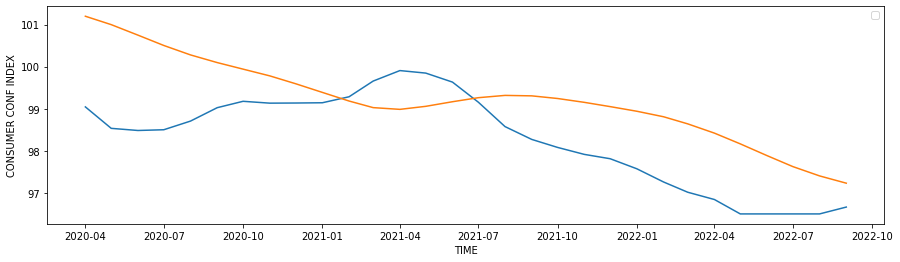

In [238]:
plt.figure( figsize=(15,4))
plt.ylabel( "CONSUMER CONF INDEX" )
plt.xlabel( "TIME" )
plt.plot( df['CONSUMER CONF INDEX'][63:] );
plt.plot( df['mavg_12'][63:]);
plt.legend();

### Calculating  MAPE and RMSE for different MOVING AVERAGE MODELS

In [239]:
import numpy as np
def get_mape(actual, predicted):
 y_true, y_pred = np.array(actual), np.array(predicted)
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [240]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['mavg_2'][63:].values)

0.35

In [241]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['mavg_4'][63:].values)

0.53

In [242]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['mavg_6'][63:].values)

0.64

In [243]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['mavg_9'][63:].values)

0.78

In [244]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['mavg_12'][63:].values)

0.91

In [245]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['mavg_4'][63:].values))
print('mse',mse)
rmse= np.sqrt(mse)
print('rmse',rmse)

mse 0.6902424769534045
rmse 0.8308083274458703


In [246]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['mavg_6'][63:].values))
print('mse',mse)
rmse= np.sqrt(mse)
print('rmse',rmse)

mse 0.8259656144294205
rmse 0.9088265040311162


In [247]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['mavg_9'][63:].values))
print('mse',mse)
rmse= np.sqrt(mse)
print('rmse',rmse)

mse 0.97127797046916
rmse 0.9855343578329271


In [248]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['mavg_12'][63:].values))
print('mse',mse)
rmse= np.sqrt(mse)
print('rmse',rmse)

mse 1.1075962798900885
rmse 1.0524240019545774


In [249]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['mavg_2'][63:].values))
print('mse',mse)
rmse= np.sqrt(mse)
print('rmse',rmse)

mse 0.4735631344079022
rmse 0.6881592362294516


### Forecasting Method 2:  Exponential Smoothing

### Model 1:  Using alpha = 0.2

In [250]:
df['ewm0.2'] = df['CONSUMER CONF INDEX'].ewm( alpha = 0.2 ).mean()
pd.options.display.float_format = '{:.2f}'.format

In [251]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['ewm0.2'][63:].values)

0.54

In [252]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['ewm0.2'][63:].values))
mse

0.6766163261919883

In [253]:
rmse= np.sqrt(mse)
rmse


0.8225669128964453

### Model 2 : using alpha = 0.97

In [254]:
df['ewm0.97'] = df['CONSUMER CONF INDEX'].ewm( alpha = 0.97 ).mean()
pd.options.display.float_format = '{:.2f}'.format

In [255]:
get_mape(df['CONSUMER CONF INDEX'][63:].values,df['ewm0.97'][63:].values)

0.01

In [256]:
from sklearn.metrics import mean_squared_error
mse= np.sqrt(mean_squared_error(df['CONSUMER CONF INDEX'][63:].values,df['ewm0.97'][63:].values))
mse

0.01020865468619075

In [257]:
rmse= np.sqrt(mse)
rmse

0.1010378873798871

## CONCLUSION FOR EXPONENTIAL SMOOTHING: ALPHA= 0.99 
### While exponential smoothing at alpha = 0.99 outperformed when value of alpha was set to 0.2.

## COMPARISON BETWEEN MOVING AVERAGE AND EXPONENTIAL SMOOTHING
#### In comparison to moving average model, Exponential Smoothing Model has performed far more better as it gives comparatively lower MAPE, RMSE, and MSE. values

### COMPREHENSIVE TABEL FOR MOVING AVERAGE & EXPONENTIAL SMOOTHING

In [258]:
df.iloc[:,[0,1,2,3,4,5,6,7]]

,CONSUMER CONF INDEX,mavg_2,mavg_4,mavg_6,mavg_9,mavg_12,ewm0.2,ewm0.97
TIME,,,,,,,,
2014-01-01,99.34,NaN,NaN,NaN,NaN,NaN,99.34,99.34
2014-02-01,99.41,NaN,NaN,NaN,NaN,NaN,99.38,99.41
2014-03-01,99.44,99.37,NaN,NaN,NaN,NaN,99.40,99.44
2014-04-01,99.52,99.43,NaN,NaN,NaN,NaN,99.44,99.52
2014-05-01,99.50,99.48,99.43,NaN,NaN,NaN,99.46,99.51
...,...,...,...,...,...,...,...,...
2022-05-01,96.50,96.93,97.17,97.40,97.70,98.16,97.45,96.51
2022-06-01,96.50,96.67,96.90,97.17,97.47,97.89,97.26,96.50
2022-07-01,96.50,96.50,96.71,96.95,97.28,97.62,97.10,96.50
